#### Import Data Files

In [21]:
%reset -f

In [22]:
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import warnings
warnings.filterwarnings('ignore')
from pyproj import Proj
import hvplot.pandas

In [23]:
!head /home/jovyan/data/bravoseis_data/SEDIMENT_DEPTH_BELOW_0.TXT

431965.34,3063407.21,3473.86
431815.52,3063607.31,3490.43
431710.61,3063747.35,3523.38
431601.90,3063892.36,3518.00
431598.15,3063897.36,3518.00
431583.15,3063917.35,3512.58
431429.32,3064122.27,3501.73
431312.89,3064277.11,3501.83
431282.82,3064317.06,3496.35
431271.54,3064332.03,3496.35


In [24]:
path2 = '/home/jovyan/data/bravoseis_data/SEDIMENT_DEPTH_BELOW_0.TXT'

In [25]:
df_basement = pd.read_csv(path2,header = None,sep = ',', names= ['utmx','utmy','zBasement'])
df_basement['zBasement'] = df_basement.zBasement.astype(float) * -1
df_basement.head()

,utmx,utmy,zBasement
0,431965.34,3063407.21,-3473.86
1,431815.52,3063607.31,-3490.43
2,431710.61,3063747.35,-3523.38
3,431601.90,3063892.36,-3518.00
4,431598.15,3063897.36,-3518.00


In [26]:
df_basement.describe()

,utmx,utmy,zBasement
count,1143.000000,1.143000e+03,1143.000000
mean,427711.314243,3.076658e+06,-1705.272563
std,6508.739472,7.649757e+03,686.953317
min,412563.870000,3.063407e+06,-3560.260000
25%,422074.355000,3.070066e+06,-1826.255000
50%,428064.930000,3.076493e+06,-1494.740000
75%,433336.620000,3.083399e+06,-1274.720000
max,440552.840000,3.092955e+06,-447.020000


<AxesSubplot:xlabel='utmx', ylabel='utmy'>

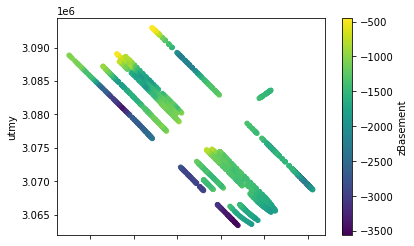

In [27]:
df_basement.plot.scatter(x='utmx', y='utmy', c='zBasement', colormap='viridis') 

In [28]:
df_basement.hvplot.points(x='utmx', y='utmy', hover_cols =['zBasement', 'normalized'])

:Points   [utmx,utmy]   (zBasement)

In [29]:
path3 = '/home/jovyan/data/bravoseis_data/Elevation.csv'

In [30]:
df_bathy = pd.read_csv(path3,header = None,sep = ',', names= ['utmx','utmy','zSeafloor'])
df_bathy.dropna(inplace=True)
df_bathy.head()

,utmx,utmy,zSeafloor
573,410820.0,3089100.0,-447.30
574,410820.0,3089100.0,-447.32
1021,411170.0,3077100.0,-1457.20
1022,411170.0,3077200.0,-1457.40
1215,410850.0,3089000.0,-447.60


In [31]:
#df_bathy.describe()

In [33]:
df_bathy.hvplot.points(x='utmx', y='utmy', hover_cols =['zSeafloor', 'normalized'],
                              color = 'zSeafloor', cmap = 'viridis', rasterize = True)

:DynamicMap   []
   :Image   [utmx,utmy]   (zSeafloor)

<AxesSubplot:xlabel='utmx', ylabel='utmy'>

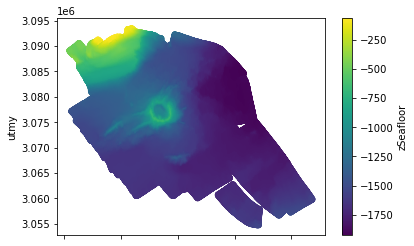

In [39]:
df_bathy.plot.scatter(x='utmx', y='utmy', c='zSeafloor', colormap='viridis') 

In [87]:
#%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

x = df_bathy['utmx'].squeeze()
y = df_bathy['utmy'].squeeze()
z = df_bathy['zSeafloor'].squeeze()
ax.scatter(x, y, z, c='r', marker='o')

x1 = df_basement['utmx'].squeeze()
y1 = df_basement['utmy'].squeeze()
z1 = df_basement['zBasement'].squeeze()
ax.scatter(x1, y1, z1, c='c', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>